# Validate and test cat classifier

## Import library

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Get data

### Training data

In [2]:
f = h5py.File('data/train_catvnoncat.h5', 'r')

list_classes = f['list_classes'][()]
train_set_x = f['train_set_x'][()]
train_set_y = f['train_set_y'][()]

m, h, wi, d = np.shape(train_set_x)
n_x = h * wi * d
processed_train_set_x = train_set_x.flatten().reshape(m, n_x).T / 255
processed_train_set_y = train_set_y.reshape(1, m)

### Test data

In [3]:
f_test = h5py.File('data/test_catvnoncat.h5', 'r')

list_classes = f_test['list_classes'][()]
test_set_x = f_test['test_set_x'][()]
test_set_y = f_test['test_set_y'][()]

m_test, h_test, w_test, d_test = np.shape(test_set_x)
n_x_test = h_test * w_test * d_test
processed_test_set_x = test_set_x.flatten().reshape(m_test, n_x_test).T / 255
processed_test_set_y = test_set_y.reshape(1, m_test)

### Weights and bias

In [4]:
w = np.loadtxt('weight.txt')
w = w.reshape((len(w), 1))

In [5]:
b = np.loadtxt('bias.txt')

In [6]:
np.random.seed(1)
random_w = np.random.uniform(low=-0.5, high=0.5, size=(n_x, 1))
random_b = np.random.uniform(low=-0.5, high=0.5)

### Define signmoid

In [7]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

## Get Accuracy

### Accuracy evaluator class and object

In [8]:
class AccuracyEvaluator:
    def __init__(self, dataX, dataY, weights, bias):
        self.dataX = dataX
        self.dataY = dataY
        self.weights = weights
        self.bias = bias
        
        A = sigmoid(np.dot(self.weights.T, self.dataX) + self.bias)
        self.predict = np.where(A < 0.5, 0., 1.)
        self.accuracy = np.round(np.sum(self.predict == self.dataY) / self.dataX.shape[1] * 100, 2)
        
        self.confusion_matrix = np.zeros((2,2))
        self.confusion_matrix[0][0] = np.sum((self.predict == 0) & (self.predict == self.dataY))
        self.confusion_matrix[0][1] = np.sum((self.predict == 0) & (self.predict != self.dataY))
        self.confusion_matrix[1][1] = np.sum((self.predict == 1) & (self.predict == self.dataY))
        self.confusion_matrix[1][0] = np.sum((self.predict == 1) & (self.predict != self.dataY))
    
    def plotConfusionMatrix(self):
        sn.heatmap(self.confusion_matrix, annot=True, fmt="n")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.show()
    
    def getFscore(self):
        precision = self.confusion_matrix[1][1] / (self.confusion_matrix[1][1] + self.confusion_matrix[1][0])
        recall = self.confusion_matrix[1][1] / (self.confusion_matrix[1][1] + self.confusion_matrix[0][1])
        f_score =  2 / (1 / precision + 1/ recall)
        return f_score
    
    def report(self):
        self.plotConfusionMatrix()
        print("Accuracy {}%".format(self.accuracy))
        print("F score {}".format(np.round(self.getFscore(), 4)))

In [9]:
train_evaluator = AccuracyEvaluator(processed_train_set_x, processed_train_set_y, w, b)
train_evaluator_random = AccuracyEvaluator(processed_train_set_x, processed_train_set_y, random_w, random_b)

test_evaluator = AccuracyEvaluator(processed_test_set_x, processed_test_set_y, w, b)
test_evaluator_random = AccuracyEvaluator(processed_test_set_x, processed_test_set_y, random_w, random_b)

### Training data

Trained weight and bias on training data


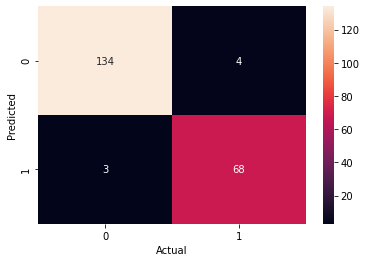

Accuracy 96.65%
F score 0.951
Random weight and bias on training data


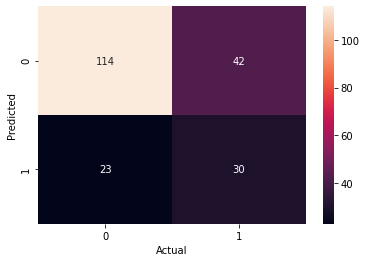

Accuracy 68.9%
F score 0.48


In [10]:
print("Trained weight and bias on training data")
train_evaluator.report()
print("===============================")
print("Random weight and bias on training data")
train_evaluator_random.report()
print("===============================")

### Test Data

Trained weight and bias on test data


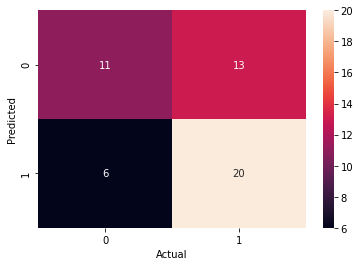

Accuracy 62.0%
F score 0.678
Random weight and bias on test data


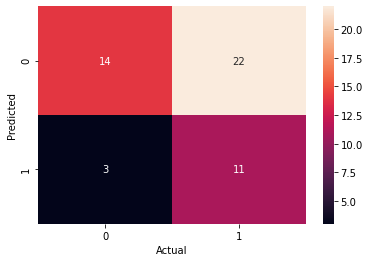

Accuracy 50.0%
F score 0.4681


In [11]:
print("Trained weight and bias on test data")
test_evaluator.report()
print("===============================")
print("Random weight and bias on test data")
test_evaluator_random.report()
print("===============================")

### Preview test data

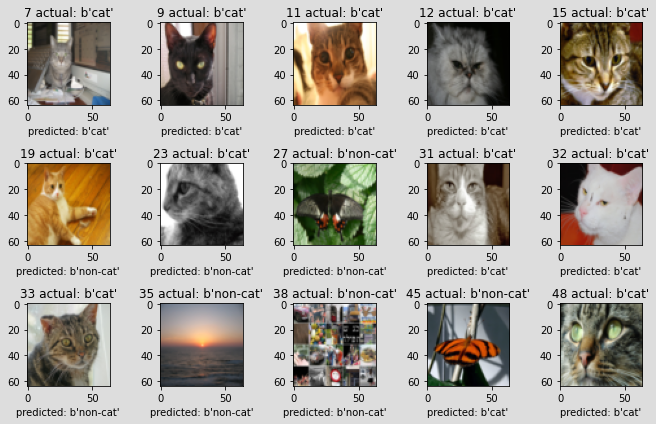

In [12]:
fig=plt.figure(figsize=(10, 6))
columns = 5
rows = 3

np.random.seed(seed=112)
indexes = np.sort(np.random.choice(len(test_set_x), size=columns*rows, replace=False))

for i in range(1, columns*rows+1):
    index = indexes[i-1]
    img = test_set_x[index]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    
    subplot_title = "{} actual: {}".format(str(index), str(list_classes[test_set_y[index]]))
    plt.title(subplot_title)
    
    class_code = test_evaluator.predict[0][index]
    prediction = list_classes[class_code.astype(int)]
    xlabel_title = "predicted: {}".format(str(prediction))
    plt.xlabel(xlabel_title)
    plt.tight_layout()

fig.set_facecolor('#dddddd')
plt.show()

## Conclusion

### Training data

| Weights and bias | Accuracy (%) | F score |
| - | - | - |
| Trained | 96.65 | 0.951 |
| Random | 68.9 | 0.48 |

### Test data

| Weights and bias | Accuracy (%) | F score |
| - | - | - |
| Trained | 62.0% | 0.678 |
| Random | 50.0 | 0.4681 |

## Evaluation

* The model needs much more training data to improve the accuracy. There are only 209 train images - not a lot for image classification standard
* The model might perform better with an additional hidden layer. The current model only has input and output layers
* Activation function. Currently used sigmoid function. Might experiment with ReLU.